# 1. ¿What is the best tariff?

The Megaline company project consists of analyzing the plans and their respective tariffs, using a relatively small sample of 500 customers, including information on who they are, their city, the plan they use, calls made, text messages sent, and internet usage during the year 2018. Based on this, the goal is to indicate which plan generates more revenue for Megaline. It is required, first of all, to load all databases, clean the data presented, create charts based on descriptive statistics, and formulate hypotheses to be tested or rejected.

## Initial setup

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st


## Loading data

In [4]:
# Loading data into separate DataFrames
df_calls=pd.read_csv(r'C:\Users\CynthiaEL\Desktop\TRIPLETEN\SPRINT 7\Planes_Telefono\megaline_calls.csv')
df_internet=pd.read_csv(r'C:\Users\CynthiaEL\Desktop\TRIPLETEN\SPRINT 7\Planes_Telefono\megaline_internet.csv')
df_messages=pd.read_csv(r'C:\Users\CynthiaEL\Desktop\TRIPLETEN\SPRINT 7\Planes_Telefono\megaline_messages.csv')
df_plans=pd.read_csv(r'C:\Users\CynthiaEL\Desktop\TRIPLETEN\SPRINT 7\Planes_Telefono\megaline_plans.csv')
df_users=pd.read_csv(r'C:\Users\CynthiaEL\Desktop\TRIPLETEN\SPRINT 7\Planes_Telefono\megaline_users.csv')

## Data preparation

The data for this project is divided into several tables. Each one is explored to gain an initial understanding of the data. If necessary, the required corrections will be made in each table. For this process, .head(), .info(), and .shape() are used.

## Tariffs

In [5]:
# Print the general/summary information about the tariff DataFrame

print(df_plans.head())
print(df_plans.info())
print(df_plans.shape)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   pla

# Print a sample of the data for the tariffs

It is not necessary to print a sample of the Tariffs DataFrame since all the information was obtained through the previous steps using .head(), .info(), and .shape(). It is observed that there are only 2 rows and 8 columns.


## Data Correction

Although it is apparent that the data contains no duplicate or missing values, a verification is performed using .isna() and .duplicated(), confirming that there is nothing to correct.

In [6]:
print(df_plans.isna().sum())
print(df_plans.duplicated().sum())

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64
0


## Data Enrichment

This point will be revisited if necessary during the rest of the project’s analysis. Otherwise, it is not necessary to add any other data to this tariffs table.

## Users

In [7]:
# Print the general/summary information about the users DataFrame.

print(df_users.head())
print(df_users.info())
print(df_users.shape)

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    

In [8]:
# Print a sample of the users DataFrame.
print(df_users.head(15))


    user_id first_name  last_name  age  \
0      1000   Anamaria      Bauer   45   
1      1001     Mickey  Wilkerson   28   
2      1002     Carlee    Hoffman   36   
3      1003   Reynaldo    Jenkins   52   
4      1004    Leonila   Thompson   40   
5      1005      Livia    Shields   31   
6      1006     Jesusa   Bradford   73   
7      1007    Eusebio      Welch   42   
8      1008      Emely    Hoffman   53   
9      1009      Gerry     Little   19   
10     1010     Wilber      Blair   52   
11     1011     Halina      Henry   73   
12     1012    Jonelle    Mcbride   59   
13     1013    Nicolas     Snider   50   
14     1014    Edmundo      Simon   61   

                                         city    reg_date      plan  \
0       Atlanta-Sandy Springs-Roswell, GA MSA  2018-12-24  ultimate   
1             Seattle-Tacoma-Bellevue, WA MSA  2018-08-13      surf   
2        Las Vegas-Henderson-Paradise, NV MSA  2018-10-21      surf   
3                               Tulsa, OK M

To begin the analysis of the users DataFrame, .head(), .info(), and .shape() are used. This shows that there are 500 rows with data across 8 columns. No non-null values are found in the columns, except for the churn_date column; as explained, there will be missing values due to the database extraction date. This is why 34 NaN values can be found in this column.

With a slightly larger sample print of 15 rows, it is possible to see data that does have a date in the churn_date column, while the others show NaN as expected.

The project description indicates the date format is (dd, mm, yy), but looking at the data table, it is in (yy, mm, dd) format. Since it is in the universal format, it will be left as is.

### Data Correction

An analysis is conducted below to determine if any corrections are needed for missing or duplicate values. It can be observed that there is no data that needs to be replaced or removed. It is only verified that there are 466 duplicate (NaN) values, which corresponds to the explanation regarding the data extraction date, while the 34 remaining values are those that show an exact date. From this, we can see that the data type is "object," but since these are dates and might be needed for later analysis, they must be changed to "datetime" type.

In [9]:
print(df_users.isna().sum())
print(df_users.duplicated().sum())

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64
0


In [10]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])
print(df_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


The data type is changed in the reg_date and churn_date columns using pd.to_datetime. To verify that the change was successful, the info is printed and the update is confirmed.

### Data Enrichment

This point will be revisited if necessary during the rest of the project’s analysis. Otherwise, it is not necessary to add any other data to this users table.

## Calls

In [11]:
# Print the general/summary information about the calls DataFrame.

print(df_calls.head())
print(df_calls.info())
print(df_calls.shape)

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None
(137735, 4)


In [12]:
# Print a sample of the calls DatFrame
print(df_calls.head(20))


          id  user_id   call_date  duration
0    1000_93     1000  2018-12-27      8.52
1   1000_145     1000  2018-12-27     13.66
2   1000_247     1000  2018-12-27     14.48
3   1000_309     1000  2018-12-28      5.76
4   1000_380     1000  2018-12-30      4.22
5   1000_388     1000  2018-12-31      2.20
6   1000_510     1000  2018-12-27      5.75
7   1000_521     1000  2018-12-28     14.18
8   1000_530     1000  2018-12-28      5.77
9   1000_544     1000  2018-12-26      4.40
10  1000_693     1000  2018-12-31      4.31
11  1000_705     1000  2018-12-31     12.78
12  1000_735     1000  2018-12-29      1.70
13  1000_778     1000  2018-12-28      3.29
14  1000_826     1000  2018-12-26      9.96
15  1000_842     1000  2018-12-27      5.85
16    1001_0     1001  2018-09-06     10.06
17    1001_1     1001  2018-10-12      1.00
18    1001_2     1001  2018-10-17     15.83
19    1001_4     1001  2018-12-05      0.00


The information for this table is printed, showing that it is a fairly extensive DataFrame in terms of rows, with only 4 columns. A sample of 15 rows is printed to get a broader idea of how this information is structured. We have integer, float, and date format data. Next, we analyze if there are any duplicate or missing values in this large number of rows.

### Data Correction

With the use of .isna and .duplicated, to check for missing values, it is confirmed that there are none. The analysis can continue.

In [13]:
print(df_calls.isna().sum())
print(df_calls.duplicated().sum())

id           0
user_id      0
call_date    0
duration     0
dtype: int64
0


In the calls DataFrame, a column with a date format is also observed, but its type appears as "object," which could be a problem for later work; therefore, it is changed to "datetime" type, and the change is verified using .info().

In [14]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
print(df_calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None


### Enriching the Data

This point will be revisited if necessary during the rest of the project’s analysis. Otherwise, it is not necessary to add any other data to this calls table.

## Messages

In [15]:
# Print the general/summary information about the messages DataFrame.

print(df_messages.head())
print(df_messages.info())
print(df_messages.shape)

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
(76051, 3)


In [16]:
# Print a sample of the messages DataFrame.
print(df_messages.head(15))


          id  user_id message_date
0   1000_125     1000   2018-12-27
1   1000_160     1000   2018-12-31
2   1000_223     1000   2018-12-31
3   1000_251     1000   2018-12-27
4   1000_255     1000   2018-12-26
5   1000_346     1000   2018-12-29
6   1000_386     1000   2018-12-30
7   1000_413     1000   2018-12-31
8   1000_502     1000   2018-12-27
9   1000_525     1000   2018-12-28
10  1000_567     1000   2018-12-25
11    1001_1     1001   2018-11-14
12    1001_2     1001   2018-08-17
13    1001_5     1001   2018-12-05
14    1001_7     1001   2018-11-28


The information for this table is printed, showing that it is a DataFrame with more than 70,000 entries and only 3 columns. A sample of 15 rows is printed to get a broader idea of how this information is structured. We have integer, object, and date format data. Next, an analysis is performed to see if there are any duplicate or missing values within this large number of rows.

### Data Correction

An analysis is performed to see if there are any data to be corrected using .isna() and .duplicated(); no data is found to be deleted or replaced. 

In [17]:
print(df_messages.isna().sum())
print(df_messages.duplicated().sum())

id              0
user_id         0
message_date    0
dtype: int64
0


In the messages DataFrame, a column with a date format is also observed, but its type appears as "object," which could be a problem for later work; therefore, it is changed to "datetime" type, and the change is verified using .info().

In [18]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
print(df_messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None


### Data Enrichment

his point will be revisited if necessary during the rest of the project’s analysis. Otherwise, it is not necessary to add any other data to this messages table.

## Internet

In [19]:
# Print the general/summary information about the internet DataFrame.

print(df_internet.head())
print(df_internet.info())
print(df_internet.shape)

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None
(104825, 4)


In [20]:
# Print a sample of the internet dataFrame.
print(df_internet.head(15))

          id  user_id session_date  mb_used
0    1000_13     1000   2018-12-29    89.86
1   1000_204     1000   2018-12-31     0.00
2   1000_379     1000   2018-12-28   660.40
3   1000_413     1000   2018-12-26   270.99
4   1000_442     1000   2018-12-27   880.22
5     1001_0     1001   2018-08-24   284.68
6     1001_3     1001   2018-12-09   656.04
7     1001_4     1001   2018-11-04    16.97
8    1001_10     1001   2018-11-27   135.18
9    1001_15     1001   2018-12-13   761.92
10   1001_16     1001   2018-10-28   501.53
11   1001_17     1001   2018-09-05   727.29
12   1001_24     1001   2018-09-05   622.03
13   1001_25     1001   2018-10-14   310.43
14   1001_26     1001   2018-09-17     0.00


The information for this table is printed, showing that it is a DataFrame with more than 100,000 entries; it is an extensive DataFrame with only 4 columns. A sample of 15 rows is printed to get a broader idea of how this information is structured. We have integer, object, float, and date data. Next, an analysis is performed to see if there are any duplicate or missing values within this large number of rows.

### Data Correction

A verification is performed using .isna() and .duplicated(), confirming that there is nothing to correct.

In [21]:
print(df_internet.isna().sum())
print(df_internet.duplicated().sum())

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64
0


In the internet DataFrame, a column with a date format is also observed, but it's type appears as "object," which could be a problem for later work; therefore, it is changed to "datetime" type, and the change is verified using .info().

In [22]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
print(df_internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None


### Data Enrichment

This point will be revisited if necessary during the rest of the project’s analysis. Otherwise, it is not necessary to add any other data to this internet table.

## Study the tariff conditions

Print the tariff conditions to take into account for the consecutive analysis.

In [23]:
# Print the tariff conditions to take into account

print(df_plans)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Add data per user

Once the data type for dates has been changed from "object" to "datetime," the information needed for the following analysis can be extracted. Only the month is extracted to calculate the user's monthly consumption of messages, minutes, and internet. By using .dt.month, it can now be used as a new column to perform calculations. Now that the data is clean, the number of calls made monthly by each user is calculated to better understand the information for subsequent analysis.

In [24]:
# Calculate the number of calls made by each user per month. Save the result.
df_calls['Month'] = df_calls['call_date'].dt.month
calls_user_monthly = df_calls.groupby(['user_id', 'Month'])['id'].count()
print(calls_user_monthly)


user_id  Month
1000     12       16
1001     8        27
         9        49
         10       65
         11       64
                  ..
1498     12       39
1499     9        41
         10       53
         11       45
         12       65
Name: id, Length: 2258, dtype: int64


The total minutes used monthly by each user is also calculated.

In [25]:
# Calculate the amount of minutes used by each user per month.

df_calls['Month'] = df_calls['call_date'].dt.month
minutes_user_monthly = df_calls.groupby(['user_id', 'Month'])['duration'].sum()
print(minutes_user_monthly)



user_id  Month
1000     12       116.83
1001     8        171.14
         9        297.69
         10       374.11
         11       404.59
                   ...  
1498     12       324.77
1499     9        330.37
         10       363.28
         11       288.56
         12       468.10
Name: duration, Length: 2258, dtype: float64


The number of messages sent by each user per month is calculated.

In [26]:
# Calculate the number of messages sent by each user per month.


df_messages['Month'] = df_messages['message_date'].dt.month
messages_user_monthly = df_messages.groupby(['user_id', 'Month'])['id'].count()
print(messages_user_monthly)



user_id  Month
1000     12       11
1001     8        30
         9        44
         10       53
         11       36
                  ..
1496     9        21
         10       18
         11       13
         12       11
1497     12       50
Name: id, Length: 1806, dtype: int64


The total GB used per month by each user is calculated.

In [27]:
# Calculate the volume of internet traffic used by each user per month.

df_internet['Month'] = df_internet['session_date'].dt.month
megabytes_user_monthly = df_internet.groupby(['user_id', 'Month'])['mb_used'].sum()
print(megabytes_user_monthly)



user_id  Month
1000     12        1901.47
1001     8         6919.15
         9        13314.82
         10       22330.49
         11       18504.30
                    ...   
1498     12       23137.69
1499     9        12984.76
         10       19492.43
         11       16813.83
         12       22059.21
Name: mb_used, Length: 2277, dtype: float64


Now, all the information previously obtained is joined into a single DataFrame to better observe the dataset and proceed with the rest of the analysis. This is done using pd.concat with the base or common columns, which are user_id and month.

In [28]:
# Merge the data for calls, minutes, messages, and internet based on user_id and month.

df_consume = pd.concat([calls_user_monthly, minutes_user_monthly, messages_user_monthly, megabytes_user_monthly], axis = 'columns')
df_consume.columns = ['calls_user_monthly', 'minutes_user_monthly', 'messages_user_monthly', 'megabytes_user_monthly']
print(df_consume)

               calls_user_monthly  minutes_user_monthly  \
user_id Month                                             
1000    12                   16.0                116.83   
1001    8                    27.0                171.14   
        9                    49.0                297.69   
        10                   65.0                374.11   
        11                   64.0                404.59   
...                           ...                   ...   
1349    12                    NaN                   NaN   
1361    5                     NaN                   NaN   
1482    10                    NaN                   NaN   
1108    12                    NaN                   NaN   
1311    6                     NaN                   NaN   

               messages_user_monthly  megabytes_user_monthly  
user_id Month                                                 
1000    12                      11.0                 1901.47  
1001    8                       30.0       

Once the table with the monthly information is ready, the information regarding the plan each user has is needed; for this, .merge is used with the user_id column to complete this data.

In [29]:
# Add the tariff information
df_columns = df_users[['user_id', 'plan']]
plan_tariff = df_consume.merge(df_columns, on = 'user_id', how = 'outer')
print(plan_tariff)


      user_id  calls_user_monthly  minutes_user_monthly  \
0        1000                16.0                116.83   
1        1001                27.0                171.14   
2        1001                49.0                297.69   
3        1001                65.0                374.11   
4        1001                64.0                404.59   
...       ...                 ...                   ...   
2298     1498                39.0                324.77   
2299     1499                41.0                330.37   
2300     1499                53.0                363.28   
2301     1499                45.0                288.56   
2302     1499                65.0                468.10   

      messages_user_monthly  megabytes_user_monthly      plan  
0                      11.0                 1901.47  ultimate  
1                      30.0                 6919.15      surf  
2                      44.0                13314.82      surf  
3                      53.0        

With this, we proceed to calculate the monthly revenue the company obtains from each user, taking into account what each client used in terms of messages, minutes, and internet compared to what their plan includes. As a first step, a new DataFrame needs to be created with the information on what each plan includes and what each user consumed monthly. This is done using .merge with the left_on and right_on parameters for 'plan' and 'plan_name', and .drop to leave only one column with the plan name.

In [30]:
# Calculate the monthly revenue for each user.

df_final_consumption = plan_tariff.merge(df_plans, left_on = 'plan', right_on = 'plan_name', how = 'left')
print(df_final_consumption.drop('plan', axis='columns'))

      user_id  calls_user_monthly  minutes_user_monthly  \
0        1000                16.0                116.83   
1        1001                27.0                171.14   
2        1001                49.0                297.69   
3        1001                65.0                374.11   
4        1001                64.0                404.59   
...       ...                 ...                   ...   
2298     1498                39.0                324.77   
2299     1499                41.0                330.37   
2300     1499                53.0                363.28   
2301     1499                45.0                288.56   
2302     1499                65.0                468.10   

      messages_user_monthly  megabytes_user_monthly  messages_included  \
0                      11.0                 1901.47               1000   
1                      30.0                 6919.15                 50   
2                      44.0                13314.82                 5

It is observed that some data now appear as NaN; because the calculation is now monthly, some customers did not use messages, minutes, or internet in certain months. Therefore, these must be replaced with the value 0 to perform the next step. 

In [31]:
columns_replace = ['calls_user_monthly', 'minutes_user_monthly', 
'messages_user_monthly', 'megabytes_user_monthly']
for col in columns_replace:
    df_final_consumption[col].fillna(0, inplace=True)

print(df_final_consumption.drop('plan', axis='columns'))

      user_id  calls_user_monthly  minutes_user_monthly  \
0        1000                16.0                116.83   
1        1001                27.0                171.14   
2        1001                49.0                297.69   
3        1001                65.0                374.11   
4        1001                64.0                404.59   
...       ...                 ...                   ...   
2298     1498                39.0                324.77   
2299     1499                41.0                330.37   
2300     1499                53.0                363.28   
2301     1499                45.0                288.56   
2302     1499                65.0                468.10   

      messages_user_monthly  megabytes_user_monthly  messages_included  \
0                      11.0                 1901.47               1000   
1                      30.0                 6919.15                 50   
2                      44.0                13314.82                 5

Once this step is completed, the calculation proceeds: the total monthly number of calls, text messages, and data is subtracted from the value included in the plan; the result is multiplied by the plan's rate for calls, text messages, and data, and finally, the monthly plan fee is added. A condition is also set using .where to indicate that the extra charge multiplication should only be performed if the value is positive—that is, if it is greater than 0, meaning the consumption was exceeded.

In [32]:

used_minutes = df_final_consumption['minutes_user_monthly'] - df_final_consumption['minutes_included']
totalprice_per_minute = used_minutes * df_final_consumption['usd_per_minute']
total_price_minutes = totalprice_per_minute.where(used_minutes > 0, 0)

used_messages = df_final_consumption['messages_user_monthly'] - df_final_consumption['messages_included'] 
totalprice_per_message = used_messages * df_final_consumption['usd_per_message']
total_price_messages = totalprice_per_message.where(used_messages > 0, 0)
used_gigabytes = df_final_consumption['megabytes_user_monthly'] - df_final_consumption['mb_per_month_included']
used_gigabytes_converted = used_gigabytes / 1024
totalprice_per_gigabyte = used_gigabytes_converted * df_final_consumption['usd_per_gb']
total_price_gigabytes = totalprice_per_gigabyte.where(used_gigabytes > 0, 0)

df_use_total = [used_minutes, used_messages, used_gigabytes]
df_extraprice_total = [total_price_minutes, total_price_messages, total_price_gigabytes]
income_x_user = total_price_minutes + total_price_messages + total_price_gigabytes + df_final_consumption['usd_monthly_pay']


print(income_x_user)

0       70.000000
1       20.000000
2       20.000000
3       88.161191
4       50.706055
          ...    
2298    95.954004
2299    20.000000
2300    60.355762
2301    34.197559
2302    85.421973
Length: 2303, dtype: float64


## Study user behavior

In the following section, we proceed with descriptive statistics for the aggregated and merged data obtained in the previous step. Useful charts are generated to facilitate understanding. Calculations are performed based on the tariff for subsequent comparison and conclusion.

### Calls

plan      month
surf      1        6.428000
          2        6.906175
          3        6.696919
          4        6.799918
          5        6.769200
          6        6.846812
          7        6.721710
          8        6.726164
          9        6.728684
          10       6.722302
          11       6.759115
          12       6.836607
ultimate  1        6.541518
          2        6.517230
          3        6.210906
          4        6.659990
          5        6.662443
          6        6.705188
          7        6.879085
          8        6.613484
          9        6.770040
          10       6.665850
          11       6.742506
          12       6.671929
Name: duration, dtype: float64
plan
surf        6.767264
ultimate    6.699939
Name: duration, dtype: float64


<Axes: title={'center': ' Average call duration'}, xlabel='plan', ylabel='Time'>

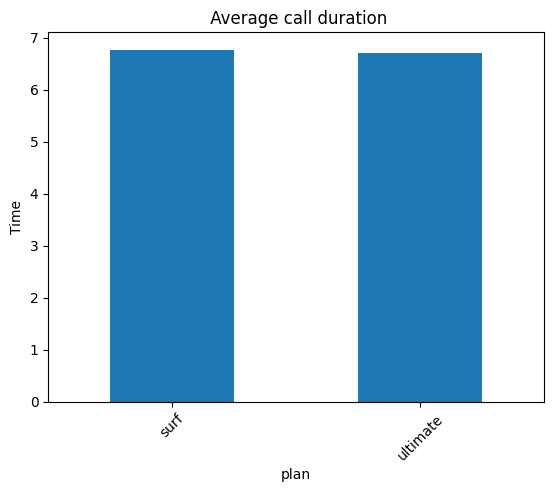

In [33]:
# Compare the average call duration for each plan and each month. Plot a bar chart to visualize it.
df_call_duration = df_calls.merge(df_users[['user_id', 'plan']], on='user_id', how='left')
df_call_duration['month'] = df_call_duration['call_date'].dt.month

average_duration = df_call_duration.groupby(['plan', 'month'])['duration'].mean()
print(average_duration)
average_calls = df_call_duration.groupby('plan')['duration'].mean()
print(average_calls)
average_calls.plot(title= ' Average call duration', kind = 'bar', ylabel= 'Time', rot=45)

The average monthly call duration for the Surf plan is 6.7672, which, compared to the Ultimate plan, is 6.6999. The chart clearly shows that there is no significant difference in the average number of calls made by customers regardless of their plan.

1       171.14
2       297.69
3       374.11
4       404.59
5       392.93
         ...  
2298    324.77
2299    330.37
2300    363.28
2301    288.56
2302    468.10
Name: minutes_user_monthly, Length: 1579, dtype: float64


Text(0.5, 1.0, 'Monthly minutes consumption - Surf')

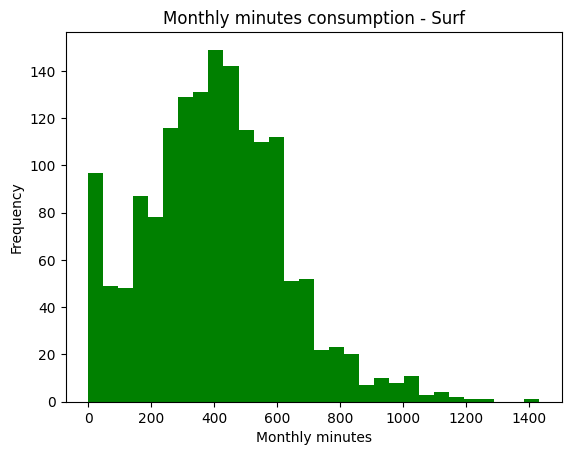

In [34]:


# Compare the number of monthly minutes required by users of each plan. Plot a histogram.

total_minutes_surf = df_final_consumption[df_final_consumption['plan_name'] == 'surf']['minutes_user_monthly']
print(total_minutes_surf)

plt.hist(total_minutes_surf, bins=30, color = 'green')
plt.xlabel('Monthly minutes')
plt.ylabel('Frequency')
plt.title('Monthly minutes consumption - Surf')


It is observed through the histogram that the average number of minutes users consume monthly is 400 minutes for the Surf plan. The graph is right-skewed. The majority of customers use 600 minutes or less per month; there is a low concentration of users consuming higher amounts.

0       116.83
19        9.32
20       54.79
26      450.21
27      422.81
         ...  
2268    505.13
2269    424.25
2270    472.15
2271    446.28
2287    276.53
Name: minutes_user_monthly, Length: 724, dtype: float64


Text(0.5, 1.0, 'Monthly minutes consumption - Ultimate')

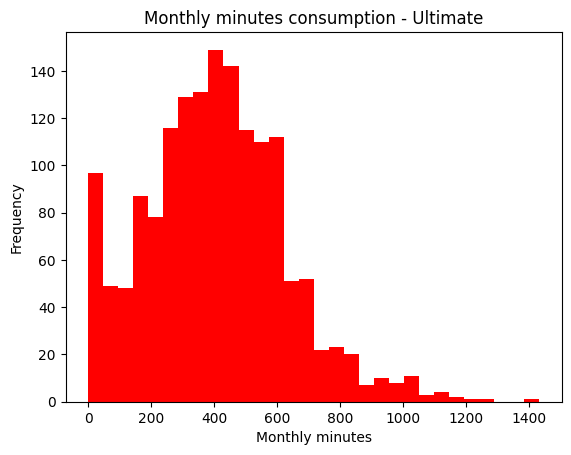

In [35]:
total_minutes_ultimate = df_final_consumption[df_final_consumption['plan_name'] == 'ultimate']['minutes_user_monthly']
print(total_minutes_ultimate)

plt.hist(total_minutes_surf, bins=30, color = 'red')
plt.xlabel('Monthly minutes')
plt.ylabel('Frequency')
plt.title('Monthly minutes consumption - Ultimate')

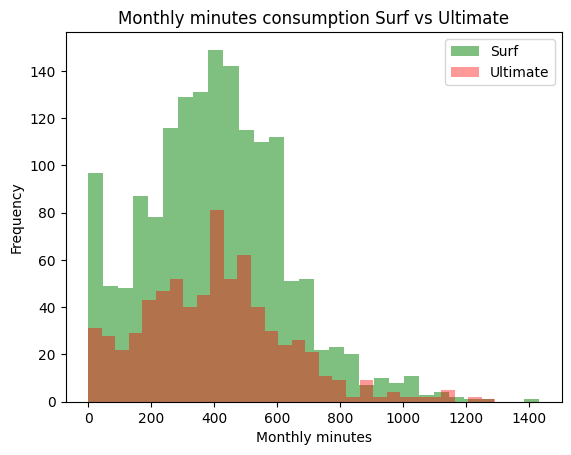

In [36]:


plt.hist(total_minutes_surf, bins=30, color = 'green', label='Surf', alpha=0.5)
plt.hist(total_minutes_ultimate, bins=30, color = 'red', label='Ultimate', alpha=0.4)
plt.xlabel('Monthly minutes')
plt.ylabel('Frequency')
plt.title('Monthly minutes consumption Surf vs Ultimate')
plt.legend()


In this chart, both the Surf and Ultimate plans can be seen, both with an average of 400 minutes per month and a right-skewed distribution. Some slightly higher peaks for the Ultimate plan are observed at higher minute values. However, it is also noted that there are fewer customers in this plan, as shown by the smaller bars on the frequency axis.

In [37]:

# Calculate the mean and the variance of the monthly call duration.

df_calls_duration = df_calls.merge(df_users[['user_id', 'plan']], on='user_id', how='left')
df_calls_duration['month'] = df_calls_duration['call_date'].dt.month

monthly_duration = df_calls_duration.groupby(['plan', 'month'])['duration'].mean()

calls_mean = df_calls_duration.groupby('plan')['duration'].mean()
print(f"The mean per plan is: {calls_mean}")

print()

df_calls_duration = df_calls.merge(df_users[['user_id', 'plan']], on='user_id', how='left')
df_calls_duration['month'] = df_calls_duration['call_date'].dt.month

monthly_duration = df_calls_duration.groupby(['plan', 'month'])['duration'].var()

varianza_llamadas = df_calls_duration.groupby('plan')['duration'].var()

print(f"The variance per plan is : {varianza_llamadas}")


The mean per plan is: plan
surf        6.767264
ultimate    6.699939
Name: duration, dtype: float64

The variance per plan is : plan
surf        34.156978
ultimate    33.964578
Name: duration, dtype: float64


The mean monthly call duration for the Surf plan is 6.767264, and for the Ultimate plan, it is 6.699939. The variance of the monthly call duration for the Surf plan is 34.156978, and for the Ultimate plan, it is 33.964578.

There is a minimal difference between the means and variances of each plan; since these are small values, they do not show great dispersion, nor are they far from the mean.

Text(0.5, 0, 'Call Duration (minutes)')

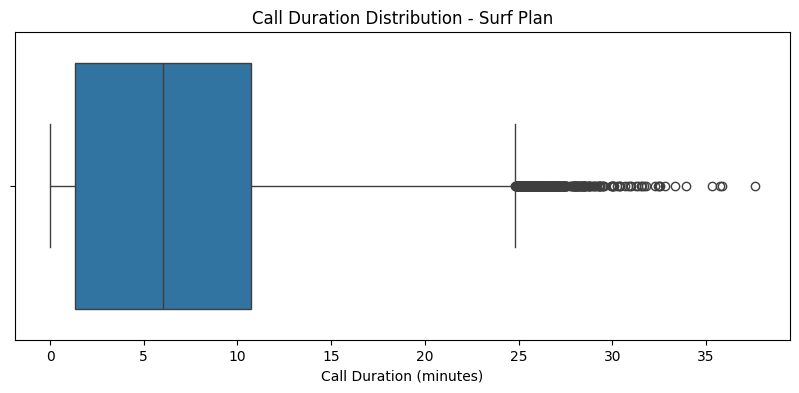

In [38]:

# Plot a box plot to visualize the distribution of monthly call duration.
plt.figure(figsize=(10,4))
sns.boxplot(data=df_calls_duration[df_calls_duration['plan'] == 'surf'], x='duration')
plt.title('Call Duration Distribution - Surf Plan')
plt.xlabel('Call Duration (minutes)')

In [39]:
df_calls_duration[df_calls_duration['plan'] == 'surf']['duration'].describe()

count    94084.000000
mean         6.767264
std          5.844397
min          0.000000
25%          1.320000
50%          6.010000
75%         10.710000
max         37.600000
Name: duration, dtype: float64

Text(0.5, 0, 'Call Duration (minutes)')

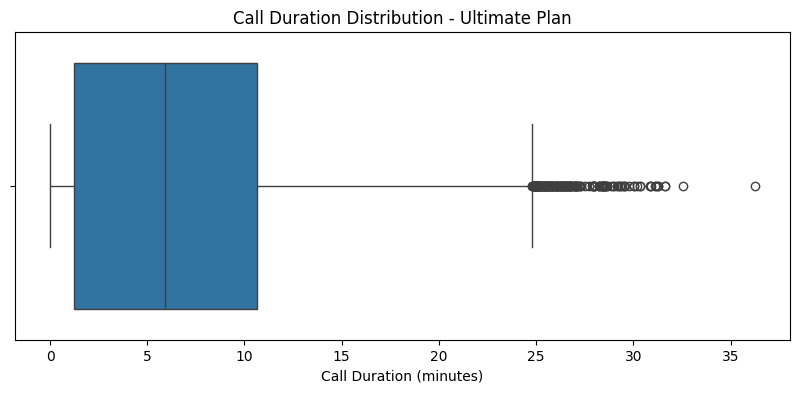

In [40]:

plt.figure(figsize=(10,4))
sns.boxplot(data=df_calls_duration[df_calls_duration['plan'] == 'ultimate'], x='duration')
plt.title('Call Duration Distribution - Ultimate Plan')
plt.xlabel('Call Duration (minutes)')

In [41]:
df_calls_duration[df_calls_duration['plan'] == 'ultimate']['duration'].describe()

count    43651.000000
mean         6.699939
std          5.827914
min          0.000000
25%          1.230000
50%          5.920000
75%         10.660000
max         36.240000
Name: duration, dtype: float64

This analysis covers the box plots for each of the plans. Through the .describe() method, the numerical similarity between both charts can be observed to complement the following analysis.

The short distance between the lower whisker and Q1 indicates that the lowest 25% of the data is concentrated within a narrow range.

The long distance between Q3 and the upper whisker reveals that the highest 25% of the data is dispersed over a wide range. This characteristic confirms a right-skewed distribution (positive skewness), as exemplified in the previous histograms.

Most calls have similar and relatively short durations, as they are concentrated in the lower part of the diagram.

There is a smaller group of calls with longer durations, as seen in the outliers beyond the whiskers.

The median, Q1, and Q3 values are practically identical between both plans, as are the lower and upper whiskers.

From this analysis, it can be inferred that the type of plan does not significantly influence call duration patterns.

### Messages

plan_name
surf        49014.0
ultimate    27037.0
Name: messages_user_monthly, dtype: float64


<Axes: title={'center': 'Total monthly messages'}, xlabel='plan_name', ylabel='Messages'>

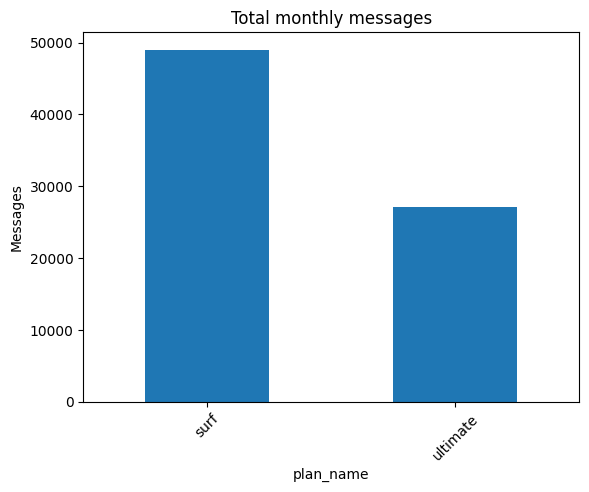

In [43]:

# Compare the number of messages that users of each plan tend to send each month.

number_messages = df_final_consumption.groupby('plan_name')['messages_user_monthly'].sum()

print(number_messages)
number_messages.plot(title= 'Total monthly messages', kind = 'bar', ylabel= 'Messages', rot=45)

A greater difference is visualized in the total messages sent by users in the Surf plan versus the Ultimate plan. Surf plan customers use more than 40,000 messages per month. On the other hand, Ultimate plan customers use more than 27,000 messages monthly.

1       30.0
2       44.0
3       53.0
4       36.0
5       44.0
        ... 
2298     0.0
2299     0.0
2300     0.0
2301     0.0
2302     0.0
Name: messages_user_monthly, Length: 1579, dtype: float64


Text(0.5, 1.0, 'Monthly messages consumption - Surf')

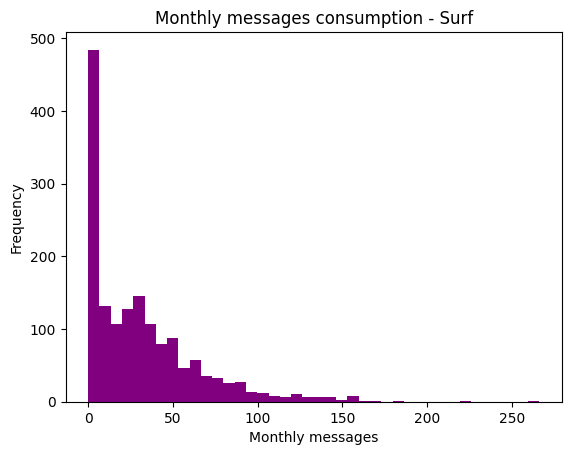

In [44]:
# Compare the number of monthly messages required by Surf plan users. Plot a histogram.

total_messages_surf= df_final_consumption[df_final_consumption['plan_name'] == 'surf']['messages_user_monthly']
print(total_messages_surf)

plt.hist(total_messages_surf, bins=40, color = 'purple')
plt.xlabel('Monthly messages')
plt.ylabel('Frequency')
plt.title('Monthly messages consumption - Surf')

The highest peak at 0 indicates that most users do not send messages in some months.

Approximately 100 customers use between 10 and 50 messages monthly, well below the 50 messages included in their plan. Most users do not take full advantage of what their plan includes.

There is a right-skewed distribution (positive skewness) due to the presence of outliers at the upper end; values are concentrated in the lower part between 0-50 messages, indicating conservative use of the messaging service.

Surf plan users underutilize the included messaging service; 50 monthly messages are more than enough for most users. However, despite being few, high-consumption users generate additional excess revenue for Megaline.

0        11.0
19       15.0
20      139.0
26       21.0
27       37.0
        ...  
2268      0.0
2269      0.0
2270      0.0
2271      0.0
2287     50.0
Name: messages_user_monthly, Length: 724, dtype: float64


Text(0.5, 1.0, 'Monthly messages consumption - Ultimate')

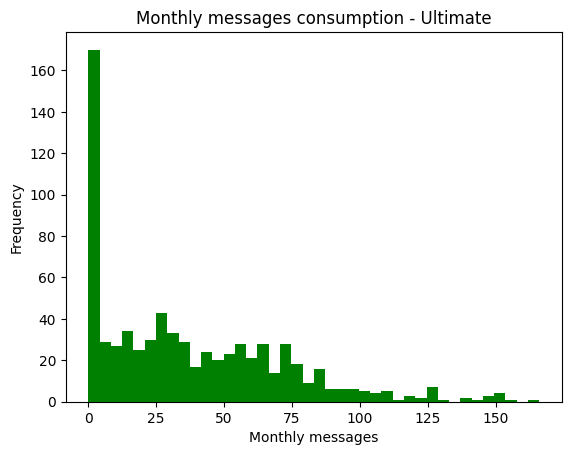

In [45]:
# Compare the number of monthly messages required by Ultimate plan users. Plot a histogram
total_messages_ultimate = df_final_consumption[df_final_consumption['plan_name'] == 'ultimate']['messages_user_monthly']
print(total_messages_ultimate)

plt.hist(total_messages_ultimate, bins=40, color = 'green')
plt.xlabel('Monthly messages')
plt.ylabel('Frequency')
plt.title('Monthly messages consumption - Ultimate')

In the Ultimate plan, the maximum peak is also at 0; a significant proportion of Ultimate users do not use messages in some months. A second peak is observed around 40, indicating the most common usage range among users, with a concentration between 10-75 messages. Approximately 10 to 40 customers use this range, which is far below the limit of 1,000 messages included in the Ultimate plan.

The allocation of 1,000 messages is excessive for the actual needs of users on this plan.

Right-skewed distribution with outliers; few to no users reach the 1,000-message limit.

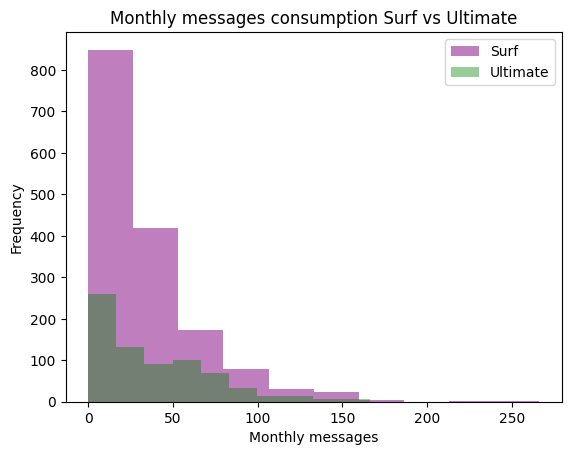

In [46]:
plt.hist(total_messages_surf, bins=10, color = 'purple', label='Surf', alpha=0.5)
plt.hist(total_messages_ultimate, bins=10, color = 'green', label='Ultimate', alpha=0.4)
plt.xlabel('Monthly messages')
plt.ylabel('Frequency')
plt.title('Monthly messages consumption Surf vs Ultimate')
plt.legend()

Comparison of the two plans: Ultimate plan users, with 1,000 messages included, use even fewer messages than Surf users with 50 messages included. Both show a concentration in low values and positive skewness. Messaging is not a priority for users in these plans.

In [47]:
# Calculate the mean and variance of the monthly number of messages.

mean_surf=df_final_consumption[df_final_consumption['plan_name'] == 'surf']['messages_user_monthly'].mean()
mean_ultimate=df_final_consumption[df_final_consumption['plan_name'] == 'ultimate']['messages_user_monthly'].mean()

print(f"The mean of the monthly number of messages for the Surf plan is {mean_surf}")
print(f"The mean of the monthly number of messages for the Ultimate plan is {mean_ultimate}")

print()

variance_surf=df_final_consumption[df_final_consumption['plan_name'] == 'surf']['messages_user_monthly'].var()
variance_ultimate=df_final_consumption[df_final_consumption['plan_name'] == 'ultimate']['messages_user_monthly'].var()

print(f"The variance of the monthly number of messages for the Surf plan is {variance_surf}")
print(f"The variance of the monthly number of messages for the Ultimate plan is {variance_ultimate}")


The mean of the monthly number of messages for the Surf plan is 31.041165294490185
The mean of the monthly number of messages for the Ultimate plan is 37.3439226519337

The variance of the monthly number of messages for the Surf plan is 1126.1180762077681
The variance of the monthly number of messages for the Ultimate plan is 1209.8276117007863


The mean monthly number of messages for the Surf plan is 31.04, and for the Ultimate plan, it is 37.34. A greater difference is observed between them, with Ultimate being higher. Although the previous analysis explained that Ultimate users use fewer messages in total (due to the sample size), the mean is higher due to higher outliers in Ultimate.

Regarding variance, both plans have high values—especially the Ultimate plan—which signifies greater data dispersion, meaning user consumption varies significantly from the mean.

Text(0.5, 0, 'Monthly messages')

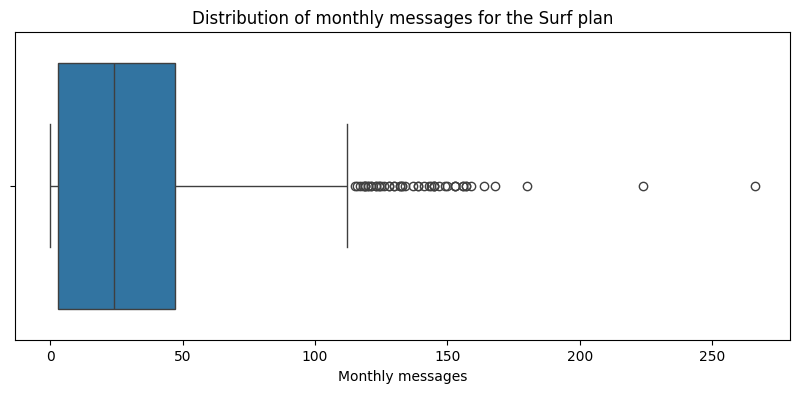

In [56]:
# Plot a box plot to visualize the distribution of the monthly number of messages.
plt.figure(figsize=(10, 4))
sns.boxplot(x = df_final_consumption[df_final_consumption['plan_name'] == 'surf']['messages_user_monthly'])
plt.title('Distribution of monthly messages for the Surf plan')
plt.xlabel('Monthly messages')


In [52]:
df_final_consumption[df_final_consumption['plan_name'] == 'surf']['messages_user_monthly'].describe()

count    1579.000000
mean       31.041165
std        33.557683
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: messages_user_monthly, dtype: float64

There is a minimal gap between the lower whisker and Q1, indicating that the lowest 25% of the data is heavily concentrated near the minimum value, likely including many 0 values as seen in the histogram.

The median is around 25,000, meaning 50% of users use 25,000 messages or less monthly. Finally, Q3 at 47,000 indicates that 75% of users do not exceed 50,000 messages.

There is a large gap between Q3 and the upper whisker, confirming a very pronounced positive skewness with a high number of outliers.

The concentration at the bottom of the chart indicates that most users have very low message consumption; typical users use only half of their monthly limit. A minority group of high-consumption users generates additional revenue for Megaline.

Text(0.5, 0, 'Monthly messages')

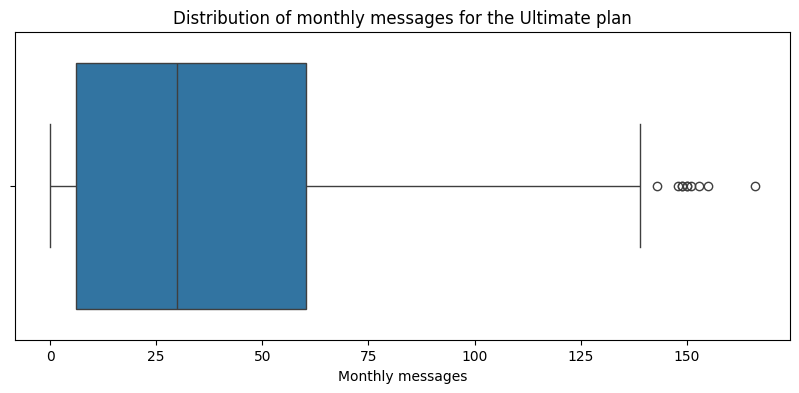

In [57]:
plt.figure(figsize=(10,4))
sns.boxplot(x = df_final_consumption[df_final_consumption['plan_name'] == 'ultimate']['messages_user_monthly'])
plt.title('Distribution of monthly messages for the Ultimate plan')
plt.xlabel('Monthly messages')

In [58]:
df_final_consumption[df_final_consumption['plan_name'] == 'ultimate']['messages_user_monthly'].describe()

count    724.000000
mean      37.343923
std       34.782576
min        0.000000
25%        6.000000
50%       30.000000
75%       60.250000
max      166.000000
Name: messages_user_monthly, dtype: float64

A wider box is observed, implying a larger IQR (Interquartile Range). The distance between Q1 (6) and Q3 (60) is greater than in the Surf plan, indicating higher variability. The median is slightly higher at 30, but still far below the 1,000-message limit.

Comparative Analysis: Ultimate users extremely underutilize the service despite paying for the most expensive plan. Surf users take better advantage of their allocation. In the Ultimate plan, users pay more without fully using the service, while outliers in both plans generate extra revenue.

### Internet

plan_name
surf        26046179.93
ultimate    12394583.78
Name: megabytes_user_monthly, dtype: float64


<Axes: title={'center': 'Total megabytes monthly'}, xlabel='plan_name', ylabel='Megabytes'>

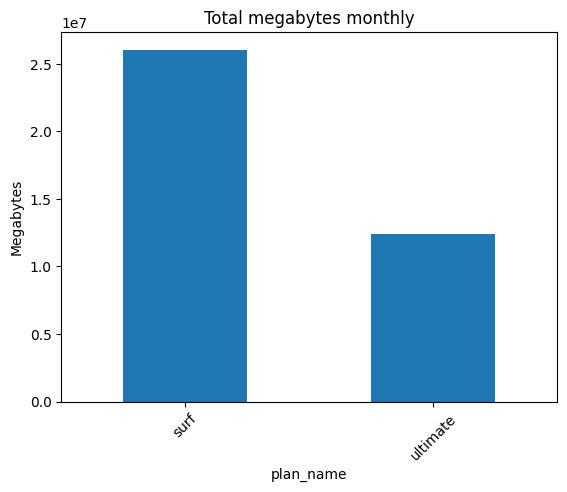

In [71]:
# Compare the amount of internet traffic consumed by users per plan.

megabytes_quantity = df_final_consumption.groupby('plan_name')['megabytes_user_monthly'].sum()

print(megabytes_quantity)
megabytes_quantity.plot(title= 'Total megabytes monthly', kind = 'bar', ylabel= 'Megabytes', rot=45)

The bar chart and the total monthly usage represent interesting consumption patterns. Surf users consume over 26 million MB even though their plan only includes 15,360 MB. In contrast, Ultimate users consume over 12 million MB with a plan that includes 30,720 MB.

It is worth noting that the excess cost for Surf is $10 per GB compared to $7 per GB for the Ultimate plan.

Interpretation: Surf users may perceive the $20 base price as low, making them more willing to exceed limits. This leads them to consume more than double the data compared to Ultimate users.

Ultimate users already pay a high base price ($70), so they may be more cautious about overages, though some still exceed the limit. This confirms that perceived value influences consumption more than actual plan capacity.

1        6919.15
2       13314.82
3       22330.49
4       18504.30
5       19369.18
          ...   
2298    23137.69
2299    12984.76
2300    19492.43
2301    16813.83
2302    22059.21
Name: megabytes_user_monthly, Length: 1579, dtype: float64


Text(0.5, 1.0, 'Monthly megabytes consumption - Surf')

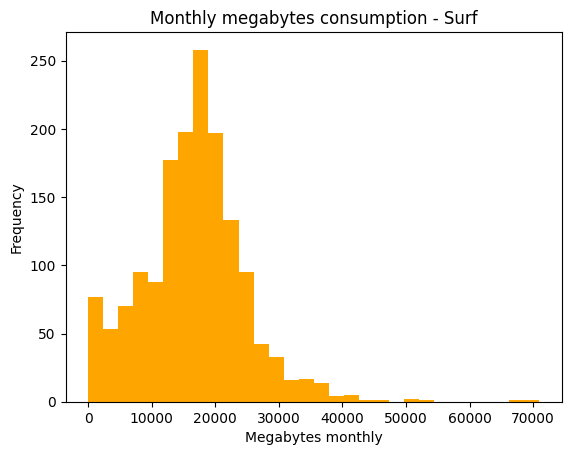

In [60]:
# Compare the number of monthly megabytes required by users of each plan. Plot a histogram.

total_megabytes_surf = df_final_consumption[df_final_consumption['plan_name'] == 'surf']['megabytes_user_monthly']
print(total_megabytes_surf)

plt.hist(total_megabytes_surf, bins=30, color = 'orange')
plt.xlabel('Megabytes monthly')
plt.ylabel('Frequency')
plt.title('Monthly megabytes consumption - Surf')

There is a peak at 18,000 megabytes, which is well above the included limit of 15,000 MB. This means that the typical behavior of a user on the Surf plan is to exceed their plan's allowance.

There is a concentration of users in the lower part of the distribution, creating a right-skewed effect, with the main range being between 0 and 20,500 megabytes.

The majority consume within this range and generate extra revenue for the company.


0        1901.47
19       2068.37
20      32118.82
26      17106.99
27      23676.72
          ...   
2268    14991.17
2269    16329.57
2270    15630.78
2271    15289.09
2287    11106.55
Name: megabytes_user_monthly, Length: 724, dtype: float64


Text(0.5, 1.0, 'Monthly megabytes consumption - Ultimate')

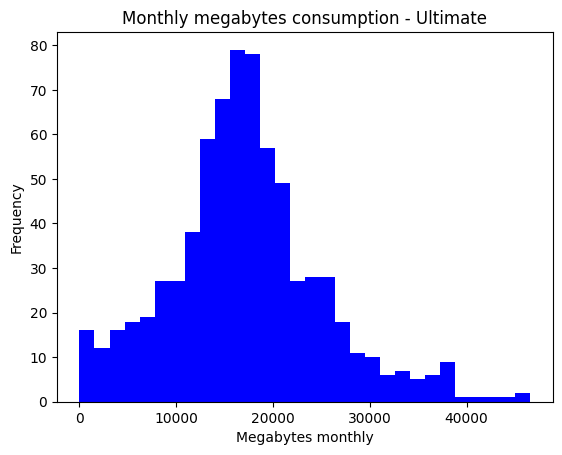

In [61]:
# Compare the number of monthly megabytes required by users of each plan. Plot a histogram.
total_megabytes_ultimate = df_final_consumption[df_final_consumption['plan_name'] == 'ultimate']['megabytes_user_monthly']
print(total_megabytes_ultimate)

plt.hist(total_megabytes_ultimate, bins=30, color = 'blue')
plt.xlabel('Megabytes monthly')
plt.ylabel('Frequency')
plt.title('Monthly megabytes consumption - Ultimate')

There is a primary peak between 18,000 and 20,000 megabytes; this peak is quite close to the plan's included limit of 30,000 MB, which suggests that many users consume a significant amount but remain within their plan's limits.

A second clustering is observed between 8,000 and 28,000 megabytes; this broader distribution shows different user segments with varied consumption patterns, where some consume little, others moderate amounts, and others a higher value, but almost always below the limit.

There are outliers that create a right-skewed distribution, representing users who are not a representative value but still generate higher revenue for Megaline.

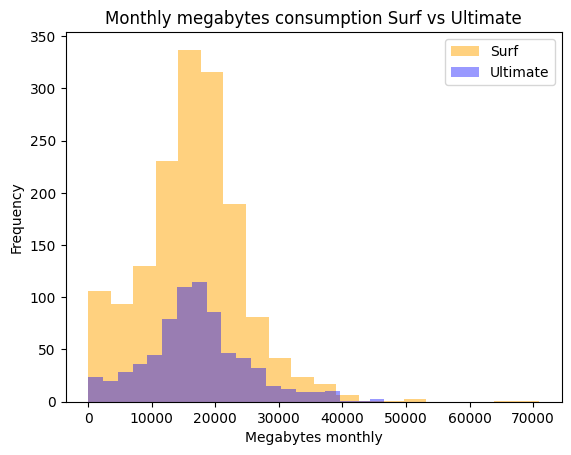

In [62]:
plt.hist(total_megabytes_surf, bins=20, color = 'orange', label='Surf', alpha=0.5)
plt.hist(total_megabytes_ultimate, bins=20, color = 'blue', label='Ultimate', alpha=0.4)
plt.xlabel('Megabytes monthly')
plt.ylabel('Frequency')
plt.title('Monthly megabytes consumption Surf vs Ultimate')
plt.legend()

In [63]:
# Calculate the mean and the variance of the monthly amount of megabytes.

mean_surf=df_final_consumption[df_final_consumption['plan_name'] == 'surf']['megabytes_user_monthly'].mean()
mean_ultimate=df_final_consumption[df_final_consumption['plan_name'] == 'ultimate']['megabytes_user_monthly'].mean()

print(f"The mean of the monthly amount of megabytes for the Surf plan is {mean_surf}")
print(f"The mean of the monthly amount of megabytes for the Ultimate plan is {mean_ultimate}")

print()

variance_surf=df_final_consumption[df_final_consumption['plan_name'] == 'surf']['megabytes_user_monthly'].var()
variance_ultimate=df_final_consumption[df_final_consumption['plan_name'] == 'ultimate']['megabytes_user_monthly'].var()

print(f"The variance of the monthly amount of megabytes for the Surf plan is {variance_surf}")
print(f"The variance of the monthly amount of megabytes for the Ultimate plan is {variance_ultimate}")

The mean of the monthly amount of megabytes for the Surf plan is 16495.364110196326
The mean of the monthly amount of megabytes for the Ultimate plan is 17119.590856353592

The variance of the monthly amount of megabytes for the Surf plan is 65010762.83183702
The variance of the monthly amount of megabytes for the Ultimate plan is 62941678.23207422


A mean of 16,495.36 is obtained for the Surf plan and a mean of 17,119.59 for the Ultimate plan. Their variances are 65,010,762.83 for the Surf plan and 62,941,678.23 for the Ultimate plan. These are very high values in both plans, indicating a greater dispersion of the data throughout the table and in reference to the mean. There are users who consume very little (almost 0), but also users who exceed the included limit by a vast amount.

Text(0.5, 0, 'Monthly megabytes')

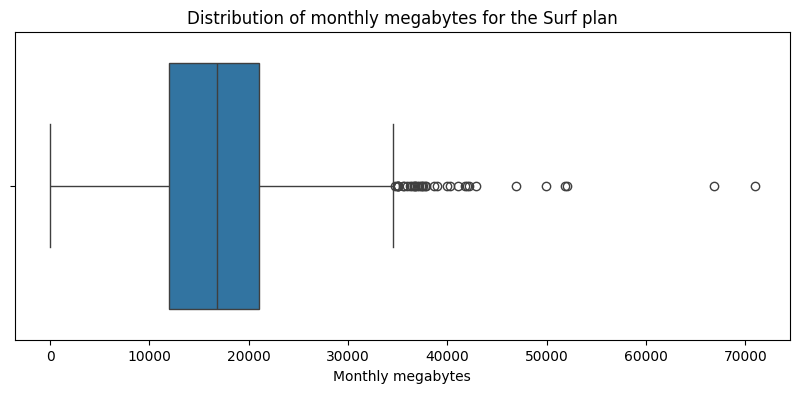

In [67]:
# TPlot a box plot to visualize the distribution of the monthly amount of megabytes
plt.figure(figsize=(10,4))
sns.boxplot(x = df_final_consumption[df_final_consumption['plan_name'] == 'surf']['megabytes_user_monthly'])
plt.title('Distribution of monthly megabytes for the Surf plan')
plt.xlabel('Monthly megabytes')

In [66]:
df_final_consumption[df_final_consumption['plan_name'] == 'surf']['megabytes_user_monthly'].describe()

count     1579.000000
mean     16495.364110
std       8062.925203
min          0.000000
25%      11968.600000
50%      16813.730000
75%      20993.075000
max      70931.590000
Name: megabytes_user_monthly, dtype: float64

By using .describe(), the exact values of the quartiles, as well as the minimum and maximum values, can be observed. The box is relatively small in size, with values starting slightly above 11,000 and exceeding 20,000. This represents what most customers consume in megabytes monthly.

The limit for the Surf plan is 15,000 MB, but the box plot ranges approximately from 11,000 to 21,000 MB. This means that 25% of users consume fewer megabytes than the included limit, while 75% of users exceed their limit and pay extra, generating higher revenue for Megaline.

Text(0.5, 0, 'Monthly megabytes')

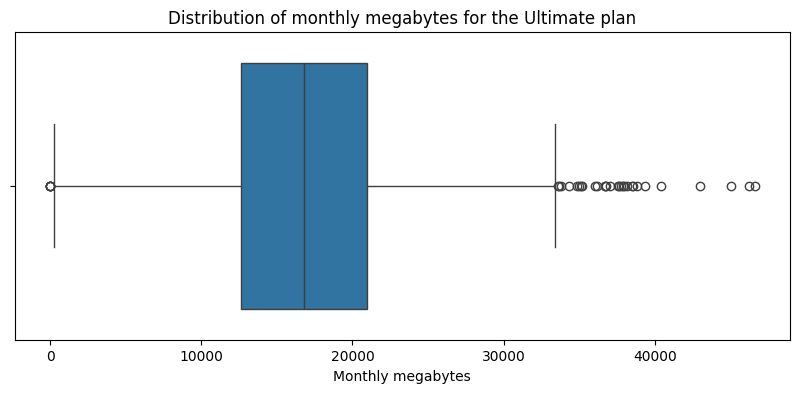

In [68]:
# Plot a box plot to visualize the distribution of the monthly amount of megabytes
plt.figure(figsize=(10,4))
sns.boxplot(x = df_final_consumption[df_final_consumption['plan_name'] == 'ultimate']['megabytes_user_monthly'])
plt.title('Distribution of monthly megabytes for the Ultimate plan')
plt.xlabel('Monthly megabytes')

In [69]:
df_final_consumption[df_final_consumption['plan_name'] == 'ultimate']['megabytes_user_monthly'].describe()

count      724.000000
mean     17119.590856
std       7933.579156
min          0.000000
25%      12617.490000
50%      16796.740000
75%      20966.662500
max      46595.330000
Name: megabytes_user_monthly, dtype: float64

The distribution observed in this diagram is almost symmetrical; the distances between the lower whisker and Q1 and between Q3 and the upper whisker are similar. The box also appears balanced and features multiple upper outliers, representing users who significantly exceed typical consumption. In this case, it is observed that user behavior does depend on the plan they are using.

Through the .describe() method, the exact values of the quartiles can be seen, with a difference between them of approximately 4,000 megabytes. This aligns with more stable consumption behavior among users, with less dispersion. In both cases, several users consume more internet than what is included in their plan, generating higher revenue for Megaline.

## Revenue

In [72]:
df_final_consumption['monthly_revenue'] = income_x_user

plan_name
surf        90243.122338
ultimate    52203.577344
Name: monthly_revenue, dtype: float64


<Axes: title={'center': 'Total monthly revenue'}, xlabel='plan_name', ylabel='Ingreso'>

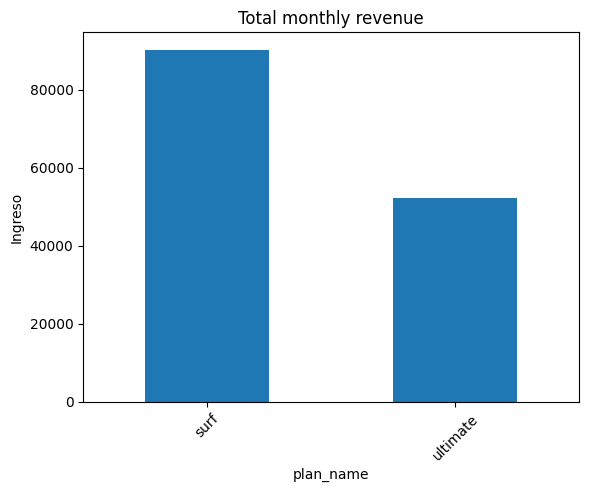

In [73]:
# Compare the monthly revenue per user for each plan.

total_revenue = df_final_consumption.groupby('plan_name')['monthly_revenue'].sum()

print(total_revenue)
total_revenue.plot(title= 'Total monthly revenue', kind = 'bar', ylabel= 'Ingreso', rot=45)

At first glance, it is clear that the revenue from the Surf plan is much higher than the revenue from the Ultimate plan, with over 57 million in monthly revenue compared to over 1.6 million, respectively. The following step provides a more detailed analysis of the revenue per plan.

1       20.000000
2       20.000000
3       88.161191
4       50.706055
5       59.152148
          ...    
2298    95.954004
2299    20.000000
2300    60.355762
2301    34.197559
2302    85.421973
Name: monthly_revenue, Length: 1579, dtype: float64


Text(0.5, 1.0, 'Monthly Revenue - Surf')

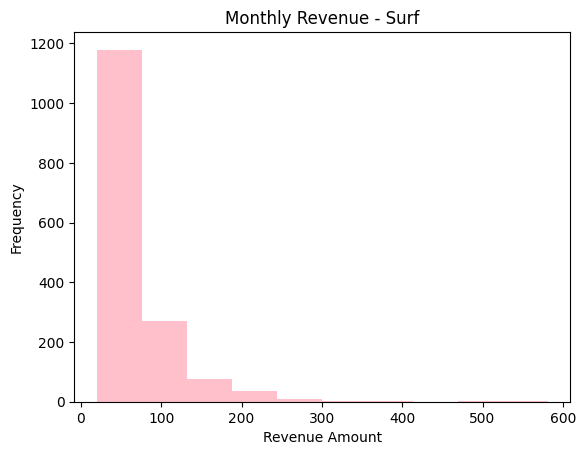

In [74]:
# Compare the total monthly revenue generated by users of each plan. Plot a histogram.

total_revenue_surf = df_final_consumption[df_final_consumption['plan_name'] == 'surf']['monthly_revenue']
print(total_revenue_surf)

plt.hist(total_revenue_surf, bins=10, color = 'pink')
plt.xlabel('Revenue Amount')
plt.ylabel('Frequency')
plt.title('Monthly Revenue - Surf')

There is a primary concentration of around 1,200 users who generate between $0 and $50,000 for Megaline. A second group consists of approximately 300 users who generate an income of around $100,000. A right-skewed distribution is evident, with outliers representing higher revenue levels.

In [75]:
df_final_consumption['monthly_revenue'] = income_x_user

0       70.000000
19      70.000000
20      79.562246
26      70.000000
27      70.000000
          ...    
2268    70.000000
2269    70.000000
2270    70.000000
2271    70.000000
2287    70.000000
Name: monthly_revenue, Length: 724, dtype: float64


Text(0.5, 1.0, 'Monthly Revenue - Ultimate')

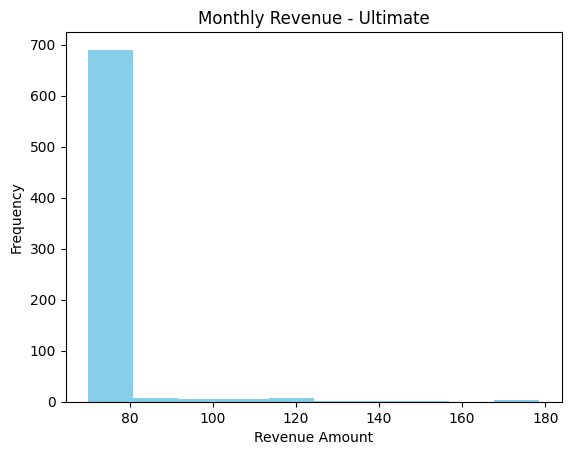

In [76]:
total_revenue_ultimate = df_final_consumption[df_final_consumption['plan_name'] == 'ultimate']['monthly_revenue']
print(total_revenue_ultimate)

plt.hist(total_revenue_ultimate, bins=10, color = 'skyblue')
plt.xlabel('Revenue Amount')
plt.ylabel('Frequency')
plt.title('Monthly Revenue - Ultimate')

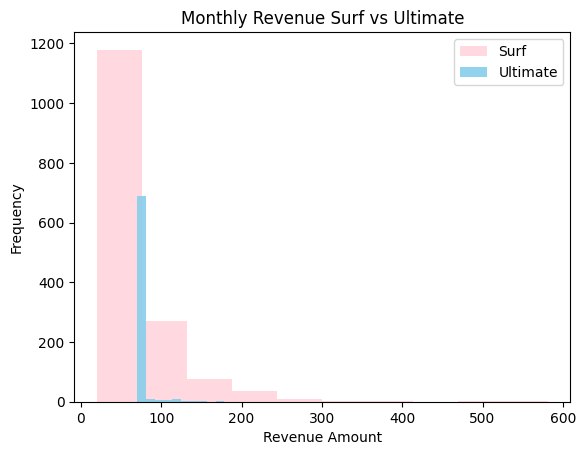

In [77]:
plt.hist(total_revenue_surf, bins=10, color = 'pink', label='Surf', alpha=0.6)
plt.hist(total_revenue_ultimate, bins=10, color = 'skyblue', label='Ultimate', alpha=0.9)
plt.xlabel('Revenue Amount')
plt.ylabel('Frequency')
plt.title('Monthly Revenue Surf vs Ultimate')
plt.legend()

When observing the chart, an extreme concentration at low values is noticeable; the vast majority of Ultimate users (around 700) generate revenue between $0 and $10,000, creating a very pronounced peak at the lower end of the distribution. After the first interval, the user frequency drops drastically, becoming so low it is barely visible on the chart; this indicates a very sharp transition between low and high-consumption users.

The distribution shows an extreme positive skew, with the absolute majority of users concentrated in the lowest revenue range, yet with the presence of outliers. Some users generate revenue exceeding $100,000, representing cases of extraordinarily high consumption that contrast sharply with the typical behavior seen in Ultimate users.

Unlike the Surf plan, the Ultimate plan shows much more uniform behavior, where most users stay within the plan's limits without generating significant overage charges.

In [78]:
# Calculate the mean and variance of the monthly revenue for each plan.

mean_surf=df_final_consumption[df_final_consumption['plan_name'] == 'surf']['monthly_revenue'].mean()
mean_ultimate=df_final_consumption[df_final_consumption['plan_name'] == 'ultimate']['monthly_revenue'].mean()

print(f"The mean of the monthly revenue for the Surf plan is {mean_surf}")
print(f"The mean of the monthly revenue for the Ultimate plan is {mean_ultimate}")

print()

variance_surf=df_final_consumption[df_final_consumption['plan_name'] == 'surf']['monthly_revenue'].var()
variance_ultimate=df_final_consumption[df_final_consumption['plan_name'] == 'ultimate']['monthly_revenue'].var()

print(f"The variance of the monthly revenue for the Surf plan is {variance_surf}")
print(f"The variance of the monthly revenue for the Ultimate plan is {variance_ultimate}")

The mean of the monthly revenue for the Surf plan is 57.152072411831064
The mean of the monthly revenue for the Ultimate plan is 72.10438859633979

The variance of the monthly revenue for the Surf plan is 2881.833930716757
The variance of the monthly revenue for the Ultimate plan is 115.35112331125602


Considering the mean and variance of this data, it is noted that the Surf plan variance shows extreme dispersion, exceeding 2 billion. On the other hand, the Ultimate plan variance is not as high but remains significant at slightly over 120 million.In the Surf plan, some users spend very little, close to their $\$20$ base plan, while others exceed it significantly, incurring charges of $\$10$ per GB. Consequently, the data distribution starts low (between 0 and 20) and spreads out toward extreme values.In the Ultimate plan, most users cluster around the $\$70$ plan limit. Although a few users fall outside the general range, there is overall less dispersion.

Text(0.5, 0, 'Revenue value')

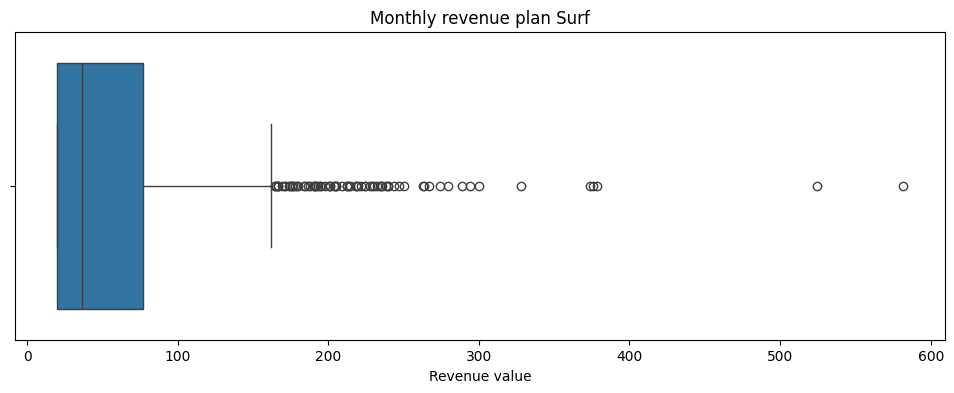

In [80]:
# Plot a box plot to visualize the distribution of monthly revenue.

plt.figure(figsize=(12,4))
sns.boxplot(x = df_final_consumption[df_final_consumption['plan_name'] == 'surf']['monthly_revenue'])
plt.title('Monthly revenue plan Surf')
plt.xlabel('Revenue value')


In [81]:
df_final_consumption[df_final_consumption['plan_name'] == 'surf']['monthly_revenue'].describe()

count    1579.000000
mean       57.152072
std        53.682715
min        20.000000
25%        20.000000
50%        36.552287
75%        76.818970
max       581.328509
Name: monthly_revenue, dtype: float64

The box plot shows a thin box, indicating a small Interquartile Range (IQR), meaning the central 50% of the data is concentrated in a narrow range. There is no lower whisker because the minimum value and Q1 are identical at $\$20$. The median is very close to Q1 at $\$36$, confirming that many users have low consumption.Q3 is $\$76.81$, meaning 75% of users spend less than this amount. The space between Q3 and the upper whisker shows the distribution of the top quartile, where many outliers exist above approximately $\$180$, with the highest reaching $\$581$.

Text(0.5, 0, 'Revenue value')

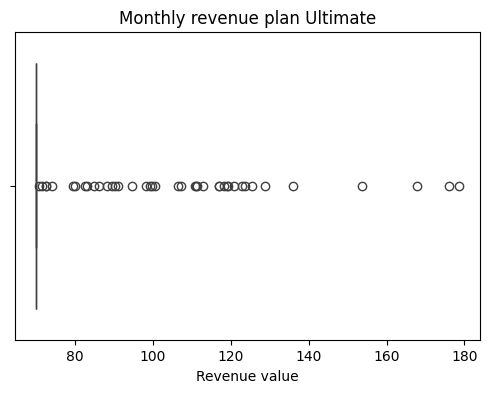

In [82]:
# Plot a box plot to visualize the distribution of monthly revenue.
plt.figure(figsize=(6,4))
sns.boxplot(x = df_final_consumption[df_final_consumption['plan_name'] == 'ultimate']['monthly_revenue'])
plt.title('Monthly revenue plan Ultimate')
plt.xlabel('Revenue value')

In [83]:
df_final_consumption[df_final_consumption['plan_name'] == 'ultimate']['monthly_revenue'].describe()

count    724.000000
mean      72.104389
std       10.740164
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      178.522764
Name: monthly_revenue, dtype: float64

This chart is striking at first glance because the box itself is not visible; Q1, Q2 (median), and Q3 are all equal. This indicates that 75% of Ultimate users pay exactly $\$70$ and do not exceed their plan limits. The remaining 25% are those who generate additional revenue between $\$71$ and $\$178$.Conclusion: Ultimate users are more conservative in their consumption; the Ultimate plan is well-sized for its users' needs.

## Test statistical hypotheses

The null hypothesis ($H_0$) is that there is NO difference in the average revenue from users of the Ultimate and Surf calling plans.
The alternative hypothesis ($H_a$) is that there IS a difference in the average revenue from users of the Ultimate and Surf calling plans.

In [84]:
# Test the hypotheses

revenue_surf = df_final_consumption[df_final_consumption['plan_name'] == 'surf']['monthly_revenue']
revenue_ultimate = df_final_consumption[df_final_consumption['plan_name'] == 'ultimate']['monthly_revenue']

results = st.ttest_ind(revenue_surf, revenue_ultimate)
alpha = .05

print('valor p: ', results.pvalue)

if (results.pvalue < alpha):
    print('The null hypothesis is rejected; the revenues ARE different.')
else:
    print('The null hypothesis is not rejected; there is no evidence of a difference between the revenues.')


valor p:  1.5695898114081275e-13
The null hypothesis is rejected; the revenues ARE different.


The null hypothesis ($H_0$) is that the average revenue from users in the NY-NJ area IS NOT different from that of users in other regions.
The alternative hypothesis ($H_a$) is that the average revenue from users in the NY-NJ area IS different from that of users in other regions.

In [85]:
# Test the hypotheses
area_ny_nj = ['New York', 'Newark', 'Jersey City']

df_users['region'] = df_users['city'].str.contains('New York-Newark-Jersey City', na=False)
df_users['region'] = df_users['region'].replace({True: 'NY-NJ', False: 'Other'})

df_consumption_region = df_final_consumption.merge(df_users[['user_id', 'region']], on='user_id', how='left')
revenue_ny_nj = df_consumption_region[df_consumption_region['region'] == 'NY-NJ']['monthly_revenue']
revenue_regiones = df_consumption_region[df_consumption_region['region'] == 'Other']['monthly_revenue']

print(f'Statistical calculations for average revenue in the NY-NJ area')
print(f'The mean for the NY-NJ area is, {revenue_ny_nj.mean()}')
print(f'The variance for the NY-NJ area is, {revenue_ny_nj.var()}')
print(f'The standard deviation for the NY-NJ area is, {revenue_ny_nj.std()}')

print()

print(f'Statistical calculations for average revenue in other regions')
print(f'The mean for the other regions is, {revenue_regiones.mean()}')
print(f'The variance for the other regions is, {revenue_regiones.var()}')
print(f'The standard deviation for the other regions is, {revenue_regiones.std()}')

print() 

results = st.ttest_ind(revenue_ny_nj, revenue_regiones)
alpha = .05

print('valor p: ', results.pvalue)

if (results.pvalue < alpha):
    print('The null hypothesis is rejected; the average revenues ARE different')
else:
    print('The null hypothesis is NOT rejected; there is no evidence of a difference between the average revenues')

Statistical calculations for average revenue in the NY-NJ area
The mean for the NY-NJ area is, 57.22437196593915
The variance for the NY-NJ area is, 1773.4714821396947
The standard deviation for the NY-NJ area is, 42.11260478929907

Statistical calculations for average revenue in other regions
The mean for the other regions is, 62.76149978125001
The variance for the other regions is, 2112.072041952898
The standard deviation for the other regions is, 45.957284971513474

valor p:  0.03008433371230006
The null hypothesis is rejected; the average revenues ARE different


# General Conclusion
### Summary by Plan:

Surf Plan ($20/month):

Users show more varied consumption behavior and frequently exceed the limits included in their plan, especially for internet. 75% of users exceed the 15,000 MB internet limit, generating significant additional revenue for Megaline. Average internet consumption: 16,495 MB monthly, exceeding the 15GB included and with many outliers. They barely use their messages, using an average of 31 messages out of the 50 included. Regarding calls, there is an average duration of 6.77 minutes.

Ultimate Plan ($70/month):

Users are more conservative in consuming what their plan includes; 75% of users pay exactly 70 dollars, staying within the plan's limits. Their average internet consumption is 17,119 MB monthly, within the 30,720 MB limit. Ultimate plan users make calls with an average of 6.70 minutes and extremely underutilize the included messages, using only 37 out of the 1,000 included.

Internet consumption is the most used service in both plans and the main generator of additional revenue, especially in the Surf plan.

The results obtained from the hypothesis tests are reviewed:
The null hypothesis was rejected (p < 0.05), confirming that there IS a significant difference in average revenue between the Surf and Ultimate plans.

The null hypothesis was rejected (p = 0.030), confirming that there IS a significant difference between the revenue from users in NY-NJ versus other regions.

### What does this mean for Megaline?
The Surf plan generates higher total revenue, with 90,243 dollars compared to Ultimate, which generates 52,204 dollars. This is because Surf has a higher number of users exceeding limits, and its excess fee per GB is higher at 10 dollars. There is more variable behavior among its users, with customers using little, medium, and several who exceed limits. As previously indicated, Surf users, by paying less monthly, are more willing to exceed limits, while Ultimate users are more conscious of spending as they already pay a high monthly fee.

These are the considerations to be taken into account by the commercial department so they can adjust the advertising budget and focus on the necessary strategies for their users and plans.
